# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

# Loading Data

In [2]:
df = pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking sape of the data

print(f"The number of Rows : {df.shape[0]}\nThe number of columns : {df.shape[1]}")

The number of Rows : 150
The number of columns : 6


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### All columns are numerical except the target columns (Species)

In [9]:
# Checking null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# Checking number of species?

df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<ipython-input-14-b9c97f7b04d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Species', data = df, palette = 'Accent')


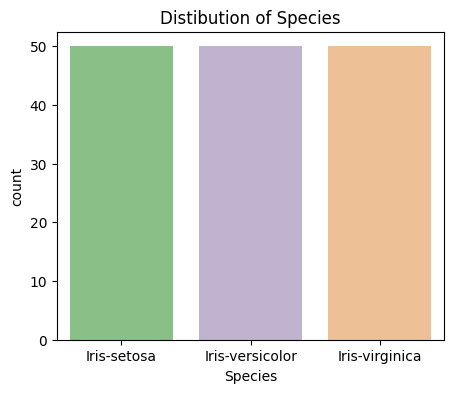

In [14]:
# checking the distribution of species

plt.figure(figsize = (5,4))
sns.countplot(x = 'Species', data = df, palette = 'Accent')
plt.title('Distibution of Species');

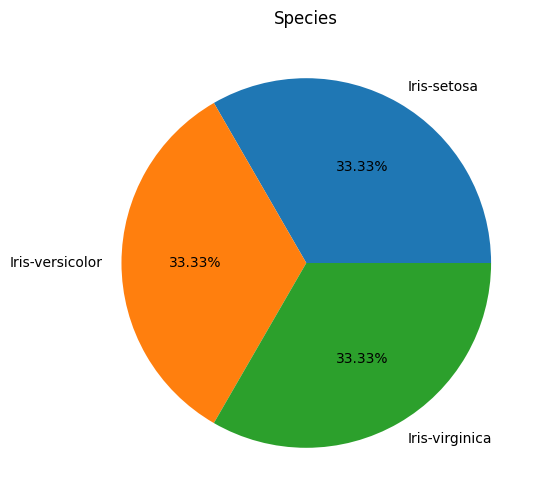

In [15]:
plt.figure(figsize=(14,6))
df['Species'].value_counts().plot(kind='pie',
                                  autopct='%0.2f%%',ylabel='',
                                  title='Species');

The species are equally distributed in the datase.

In [16]:
df['Species'].nunique()

3

There are 3 different species - Iris-setosa, Iris-versicolor and Iris-virginica

In [17]:
setosa = df[df.Species == 'Iris-setosa']
versicolor = df[df.Species == 'Iris-versicolor']
virginica = df[df.Species == 'Iris-virginica']

In [18]:
setosa.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


The Sepal Length of Setosa is in the range of 4.3 cm to 5.8 cm.

The Sepal Width of Setosa is in the range of 2.3 cm to 4.4 cm.

The Petal Length of Setosa is in the range of 1 cm to 1.9 cm.

The Petal Width of Setosa is in the range of 0.1 cm to 0.6 cm.

In [19]:
versicolor.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


The Sepal Length of Versicolor is in the range of 4.9 cm to 7.0 cm.

The Sepal Width of Versicolor is in the range of 2.0 cm to 3.4 cm.

The Petal Length of Versicolor is in the range of 3 cm to 5.1 cm.

The Petal Width of Versicolor is in the range of 1 cm to 1.8 cm.

In [20]:
virginica.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


The Sepal Length of Virginica is in the range of 4.9 cm to 7.9 cm.

The Sepal Width of Virginica is in the range of 2.2 cm to 3.8 cm.

The Petal Length of Virginica is in the range of 4.5 cm to 6.9 cm.

The Petal Width of Virginica is in the range of 1.4 cm to 2.5 cm.

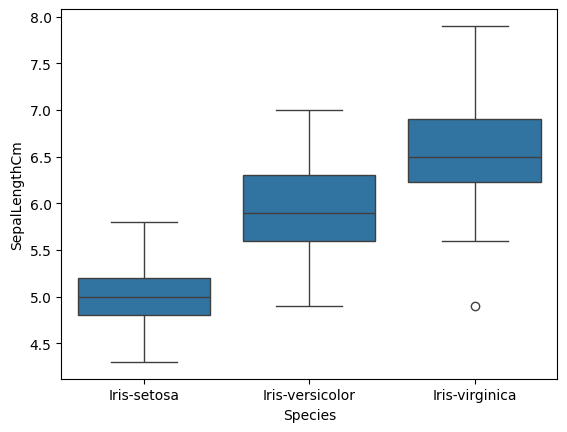

In [21]:
# creating boxplot to check the outliers in the data

sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df);


Sepal Length : Virginica > Versicolor > Setosa

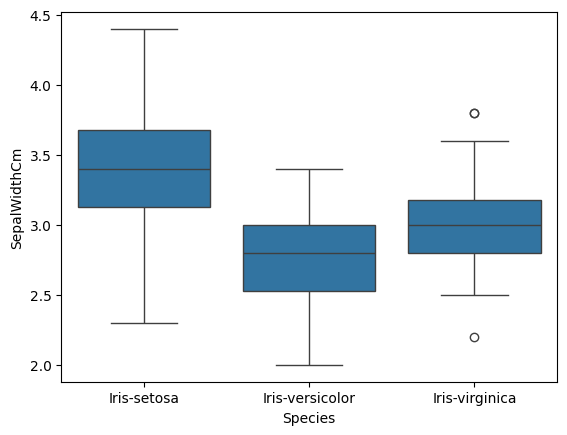

In [22]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df);

Sepal Width : Setosa > Virginica > Versicolor

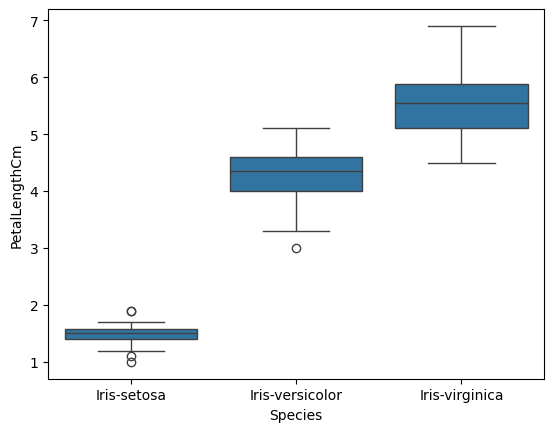

In [23]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df);


Petal Length : Virginica > Versicolor > Setosa

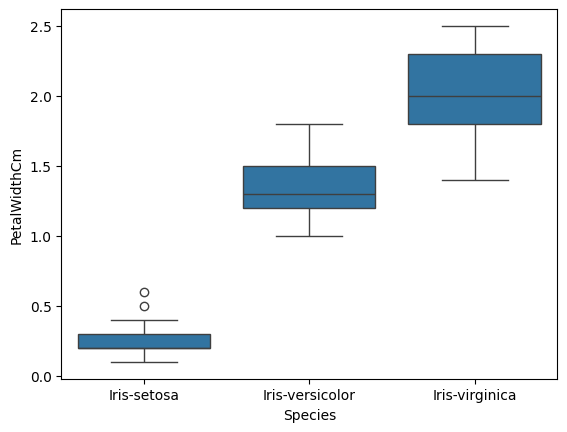

In [24]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df);

Petal Width : Virginica > Versicolor > Setosa

Observation :

Sepal Length is the largest in Virginica and smallest in Setosa

Sepal Width is the largest in Setosa and smallest in Versicolor

Petal Length is the largest in Virginica and smallest in Setosa

Petal Width is the largest in Virginica and smallest in Setosa

It means Iris Virginica has Longer and Wider petals and Iris setosa has smaller and narrower petals.

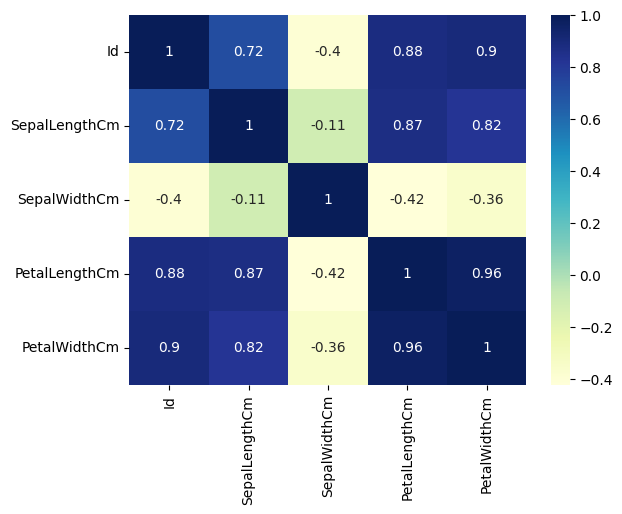

In [25]:
sns.heatmap(df.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu');


Overall, Petal Length and Petal Width are highly correlated

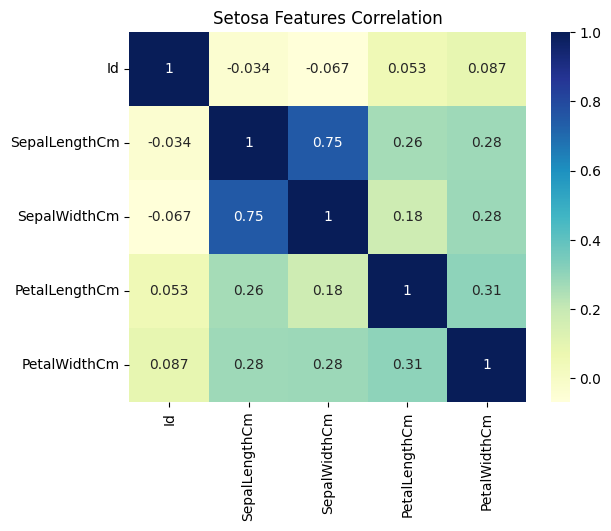

In [26]:
sns.heatmap(setosa.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')
plt.title('Setosa Features Correlation');

Sepal Length and Sepal Width are correlated in Iris Setosa Species

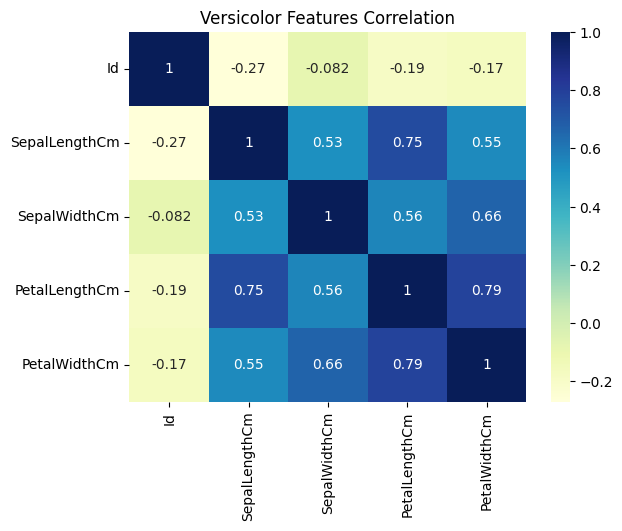

In [27]:
sns.heatmap(versicolor.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')
plt.title('Versicolor Features Correlation');

Sepal Length and Petal Length are correlated in Iris Versicolor Species

Petal Length and Petal Width are also correlated in Iris Setosa Species

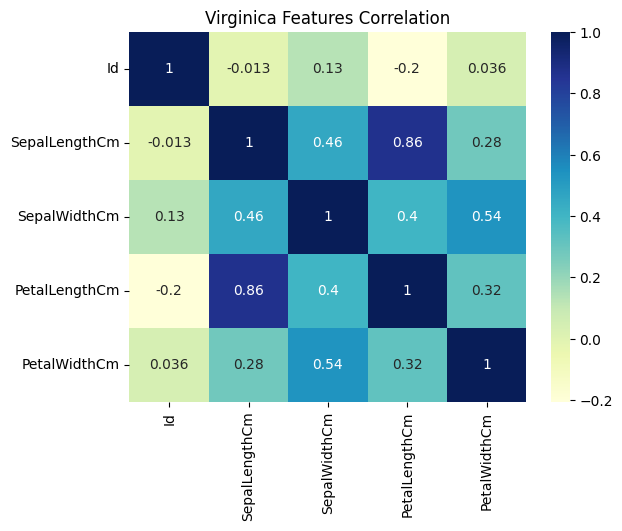

In [28]:
sns.heatmap(virginica.iloc[:,:-1].corr(), annot = True, cmap = 'YlGnBu')
plt.title('Virginica Features Correlation');

Sepal Length and Petal Length are correlated in Iris Virginica Species

# Encoding

Since the **Speceies** column is categorical which is our target column. encoding the categories to integers. This task is multi-class classification task and the classes being the species (Iris Setosa, Iris Versicolor and Iris Virginica). Let's encode Iris Setosa as 0, Iris Versicolor as 1 and Iris Virginica as 2.

In [30]:
def encode_species(s):
    if s == 'Iris-setosa':
        return 0
    elif s == 'Iris-versicolor':
        return 1
    else :  #Iris-virginica
        return 2

In [31]:
def decode_species(s):
    if s == 0:
        return 'Iris-setosa'
    elif s == 1:
        return 'Iris-versicolor'
    else : #s == 2
        return 'Iris-virginica'

In [32]:
df['Species'] = df['Species'].apply(lambda x : encode_species(x))

#converting datatype to integer
df['Species'] = df['Species'].astype('int32')

In [33]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [34]:
df.value_counts('Species')

Species
0    50
1    50
2    50
Name: count, dtype: int64

# Split Data

In [35]:
x = df.drop(['Id','Species'], axis = 1).values
y = df.iloc[:,-1].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                    random_state= 42, stratify = y)

In [37]:
print(f"""SHAPES :
x_train : {x_train.shape}
y_train : {y_train.shape}
x_test : {x_test.shape}
y_test : {y_test.shape}""")

SHAPES :
x_train : (112, 4)
y_train : (112,)
x_test : (38, 4)
y_test : (38,)


# Model Building

**Classification Models :**

* Logistic Regression
* K Nearest Neighbors
* Naive Bayes
* Decision Tree
* Support Vector Machine
* Random Forest

### Logistic Regression

In [38]:
logistic_regression = LogisticRegression()

In [39]:
logistic_regression.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
logistic_regression_predictions = logistic_regression.predict(x_test)

In [41]:
def get_report(actual, predicted):

    print(f"ACCURACY : {accuracy_score(actual, predicted)}")

    print(f"CLASSIFICATION REPORT : \n{classification_report(actual, predicted)}")

    conf_mat  = confusion_matrix(actual, predicted)

    sns.heatmap(conf_mat, annot = True, cmap = 'Purples')
    plt.title('CONUSION MATRIX');

ACCURACY : 0.9473684210526315
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



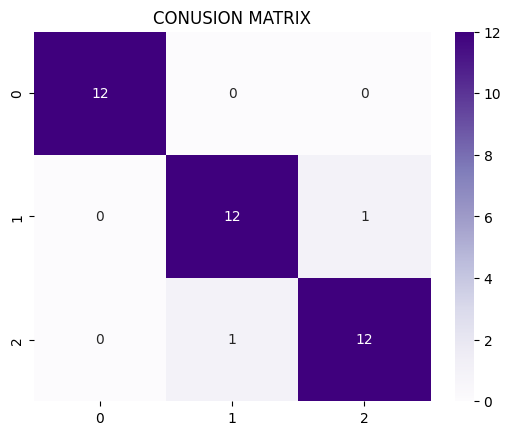

In [42]:
get_report(y_test, logistic_regression_predictions)

### K Nearest Neighbors

In [43]:
k_nearest = KNeighborsClassifier()

In [44]:
k_nearest.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
k_nearest_predictions = k_nearest.predict(x_test)

ACCURACY : 0.9736842105263158
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



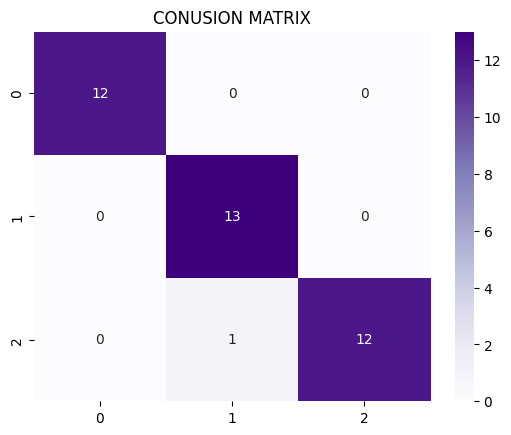

In [46]:
get_report(y_test, k_nearest_predictions)

### Naive Bayes

In [47]:
naive_bayes = GaussianNB()

In [48]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [49]:
naive_bayes_predictions = naive_bayes.predict(x_test)


ACCURACY : 0.9210526315789473
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



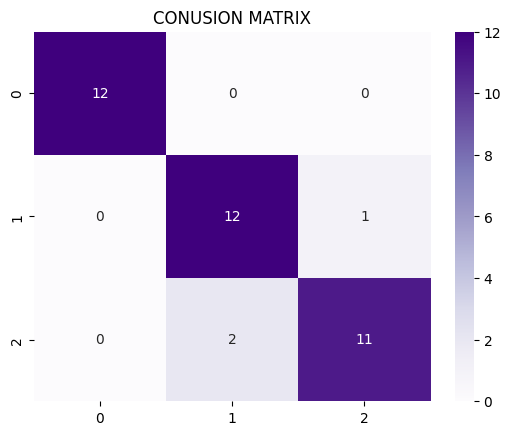

In [50]:
get_report(y_test, naive_bayes_predictions)

### Decision Tree

In [51]:
decision_tree = DecisionTreeClassifier()

In [52]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
decision_tree_predictions = decision_tree.predict(x_test)

ACCURACY : 0.9210526315789473
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



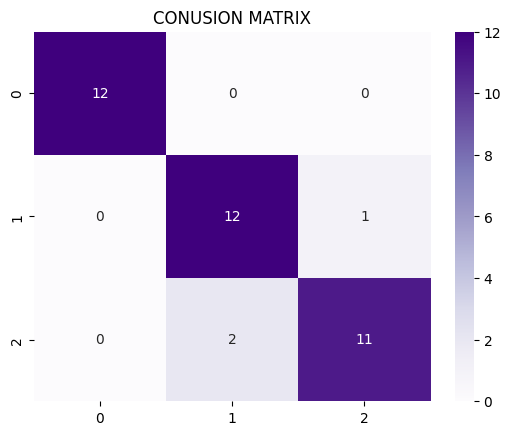

In [54]:
get_report(y_test, decision_tree_predictions)

### Support Vector Machine

In [55]:
support_vec = SVC()

In [56]:
support_vec.fit(x_train, y_train)

SVC()

In [57]:
support_vec_predictions = support_vec.predict(x_test)

ACCURACY : 0.9210526315789473
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



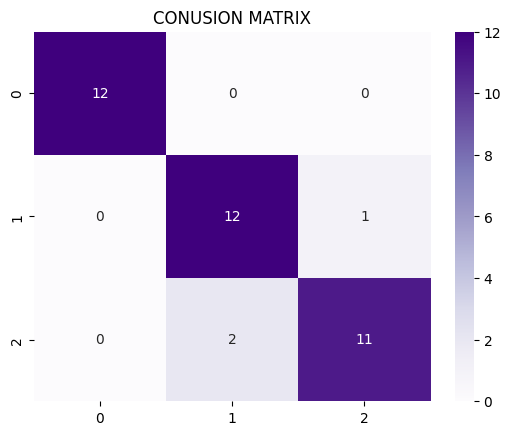

In [58]:
get_report(y_test, support_vec_predictions)

### Random Forest

In [59]:
random_forest = RandomForestClassifier()

In [60]:
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
random_forest_predictions = random_forest.predict(x_test)

ACCURACY : 0.9210526315789473
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



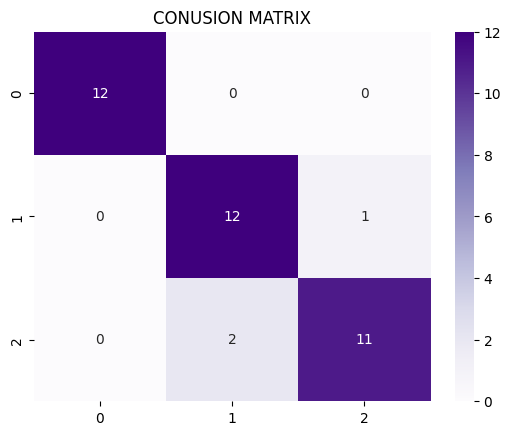

In [62]:
get_report(y_test, random_forest_predictions)

In [63]:
results = []

for i in k_nearest_predictions:
    results.append(decode_species(i))

<ipython-input-64-d6a1eca2ba82>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(results, palette = 'Accent')


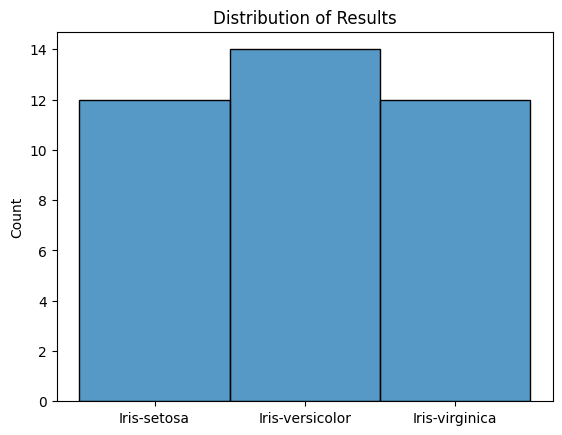

In [64]:
sns.histplot(results, palette = 'Accent')
plt.title('Distribution of Results');

### KNeighborsClassifier() has the highest accuracy score between all the model, so i will use KNeighborsClassifier() to predict the result.

# Get final Result

In [65]:
def get_result(sepal_length, sepal_width, petal_length, petal_width ):

    data = np.array([sepal_length, sepal_width, petal_length, petal_width])
    data = data.reshape(1, -1)
    prediction = k_nearest.predict(data)

    return decode_species(prediction[0])

In [66]:
sepal_length = 1.2
sepal_width = 3.2
petal_length = 4.5
petal_width = 5

get_result(sepal_length, sepal_width, petal_length, petal_width)

'Iris-virginica'